In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

print(tf.__version__)
data_dir = r"meat_copy"

batch_size = 32
img_height = 128
img_width = 128

2.11.0


In [2]:
import numpy as np
import pandas as pd

import os
#for dirname, _, filenames in os.walk('meat_copy'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

In [3]:

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 2266 files belonging to 3 classes.
Using 1813 files for training.
Found 2266 files belonging to 3 classes.
Using 453 files for validation.


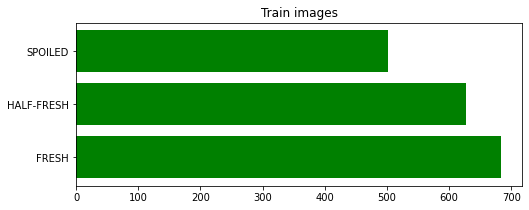

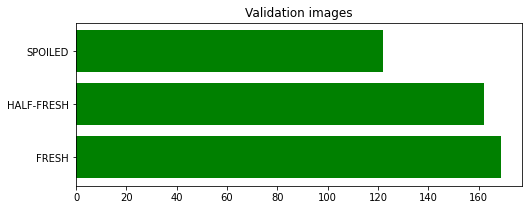

In [4]:
def plot_distribution(y, title):
    a = Counter(y)
    y = ['FRESH', 'HALF-FRESH', 'SPOILED']
    
    x = [a[i] for i in range(3)]
    plt.figure(figsize=(8,3))
    plt.barh(y, x, color='green')
    plt.title(title)
    return plt.show()

y_train = np.concatenate([y for x, y in train_ds], axis = 0)
y_val = np.concatenate([y for x, y in val_ds], axis = 0)

plot_distribution(y_train, title = "Train images")
plot_distribution(y_val, title = "Validation images")

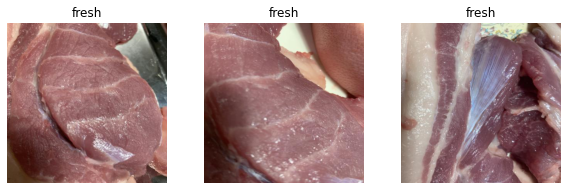

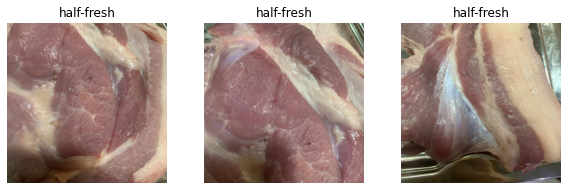

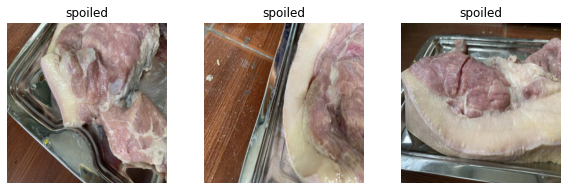

In [5]:
#target distribution

class_names = train_ds.class_names

for class_name in class_names:
    images = os.listdir(os.path.join(data_dir, class_name))[:3]
    plt.figure(figsize = (10, 10))
    for i, img in enumerate(images):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(plt.imread(os.path.join(data_dir, class_name, img)))
        plt.title(class_name)
        plt.axis('off')

In [6]:
#configure the dataset for performance 

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [7]:
#model architecture

num_class = 3

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(img_height, img_width, 3)),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D(16, 3, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(28, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_class, activation='softmax')
    
])

model.compile(optimizer ='adam', 
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                     min_delta = 0.0001,
                                                     patience = 5)

history = model.fit(train_ds, validation_data = val_ds,
                   epochs = 25,
                   callbacks = [earlystop_callback])

Epoch 1/25
57/57 [==============================] - 11s 166ms/step - loss: 1.1313 - accuracy: 0.3889 - val_loss: 0.9751 - val_accuracy: 0.6049
Epoch 2/25
57/57 [==============================] - 8s 139ms/step - loss: 0.9848 - accuracy: 0.4545 - val_loss: 0.8403 - val_accuracy: 0.5872
Epoch 3/25
57/57 [==============================] - 8s 144ms/step - loss: 0.9220 - accuracy: 0.4931 - val_loss: 0.7608 - val_accuracy: 0.6049
Epoch 4/25
57/57 [==============================] - 8s 135ms/step - loss: 0.8559 - accuracy: 0.5290 - val_loss: 0.7992 - val_accuracy: 0.5629
Epoch 5/25
57/57 [==============================] - 8s 143ms/step - loss: 0.8459 - accuracy: 0.5262 - val_loss: 0.7358 - val_accuracy: 0.6711
Epoch 6/25
57/57 [==============================] - 8s 135ms/step - loss: 0.7937 - accuracy: 0.5643 - val_loss: 0.6601 - val_accuracy: 0.6623
Epoch 7/25
57/57 [==============================] - 8s 139ms/step - loss: 0.7776 - accuracy: 0.5725 - val_loss: 0.6458 - val_accuracy: 0.6976
Epoch

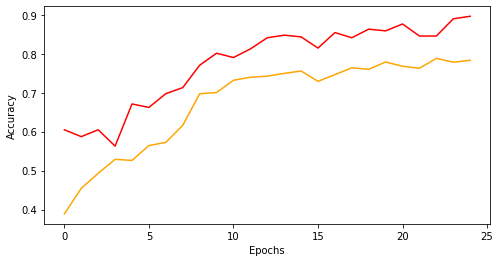

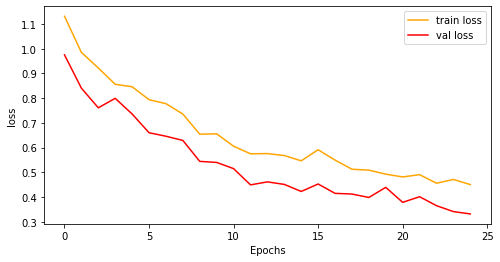

In [10]:
train_l = history.history['loss']
train_acc = history.history['accuracy']
valid_l = history.history['val_loss']
valid_acc = history.history['val_accuracy']

#accuracy plot

plt.figure(figsize = (8,4))
plt.plot(train_acc, color='orange', linestyle='-', label='train accuracy')
plt.plot(valid_acc, color='red', linestyle='-', label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

#loss plots

plt.figure(figsize=(8,4))
plt.plot(train_l, color='orange', linestyle='-', label='train loss')
plt.plot(valid_l, color='red', linestyle='-', label='val loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [12]:
loss, acc = model.evaluate(val_ds, batch_size = batch_size)
print("Validation accuracy: ", round(acc, 2))
print("Validation loss: ", round(loss, 2))



15/15 [==============================] - 0s 31ms/step - loss: 0.3315 - accuracy: 0.8962
Validation accuracy:  0.9
Validation loss:  0.33


In [ ]:
y_pred = []
y_true = []

for image_batch, label_batch in test_ds:
    y_true.append(label_batch)
    pred = model.predict(image_batch)
    y_pred.append(np.argmax(pred, axis = -1))
    
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)


In [ ]:
cm = confusion_matrix(correct_labels, predicted_labels, normalize='true')
sns.heatmap(cm, annot=True, cmap='viridis', cbar=None)
plt.title("Confusion matrix", fontweight='bold')
plt.ylabel("True", fontsize=14)
plt.xlabel("Predicted", fontsize=14)
plt.show()

In [ ]:
print(classification_report(correct_labels, predicted_labels))

In [ ]:
def prediction(img):
    class_names = ['fresh_meat', 'half_fresh_meat', 'Spoiled_meat']
    
    my_img = load_img(img, target_size = (img_height, img_width))
    my_img = img_to_array(my_img)
    my_img = np.expand_dims(my_img, 0)
    
    out = np.round(model.predict(my_img)[0], 2)
    fig = plt.figure(figsize=(7,4))
    plt.barh(class_names, out, color = 'gray', edgecolor = 'black', linewidth = 1, height = 0.5)
    
    for index, value in enumerate(out):
        plt.text(value/2 + 0.1, index, f"{100*value:.2f}%", fontweight = 'bold')
    
    plt.xticks([])
    plt.yticks([0,1,2], labels = class_names, fontweight = 'bold', fontsize = 14)
    fig.savefig('predicted_image.png', bbox_inches = 'tight')
    return plt.show()


    

In [ ]:
img = 'fesh.jpg'
prediction(img)

In [ ]:
img1 = 'spoiled_img.jpg'
prediction(img1)

In [ ]:
img2 = 'test.jpg'
prediction(img2)